In [48]:
!pip install kneed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

import scipy.cluster.hierarchy as shc
from collections import Counter

C:\Users\Win 10\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('BankNote.csv')
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [4]:
df.shape

(1372, 5)

In [5]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [6]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [7]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

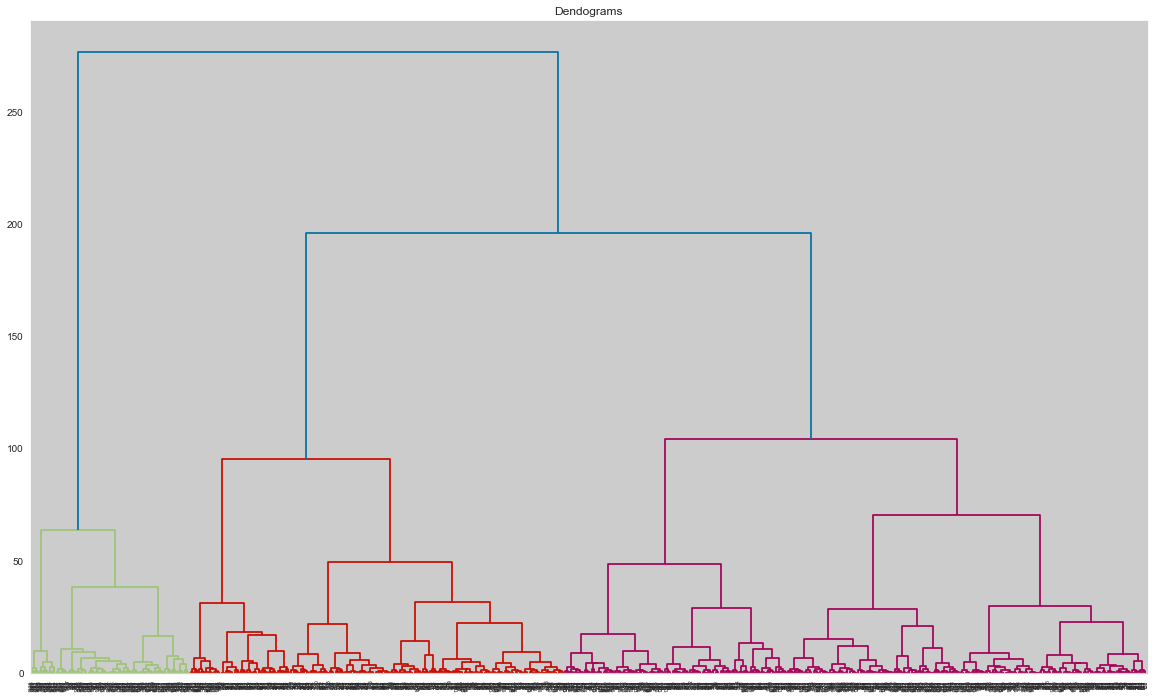

In [8]:
plt.figure(figsize=(20, 12))
plt.title("Dendograms")
dendogram = shc.dendrogram(shc.linkage(df_pca, method='ward'))

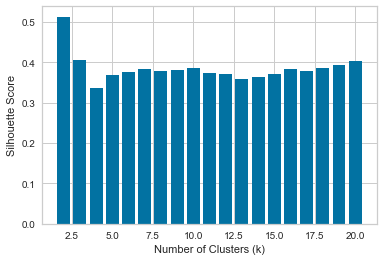

Best value of k: 2


In [15]:
# Set range of k values to test
k_values = range(2, 21)

# Initialize empty lists to store results
silhouette_scores = []
num_clusters = []

# Loop over k values and perform clustering
for k in k_values:
    clusterer = AgglomerativeClustering(n_clusters=k, linkage='ward')
    cluster_labels = clusterer.fit_predict(df_pca)
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    num_clusters.append(k)

# Plot silhouette scores vs. number of clusters
plt.bar(num_clusters, silhouette_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Find the best value of k based on silhouette score
best_k = num_clusters[np.argmax(silhouette_scores)]
print("Best value of k:", best_k)

## Best cluster
k=2

In [22]:
# Perform clustering with best k value
cluster = AgglomerativeClustering(n_clusters=best_k, linkage='ward')
labels = clusterer.fit_predict(df_pca)

In [24]:
np.unique(labels)

array([0, 1], dtype=int64)

In [25]:
def plot_cluster(df,labels):
    unique_labels = np.unique(labels)
    for i in unique_labels:
        plt.scatter(df[labels == i, 0],df[labels == i, 1], label =i)
    plt.legend()    
    plt.show()    

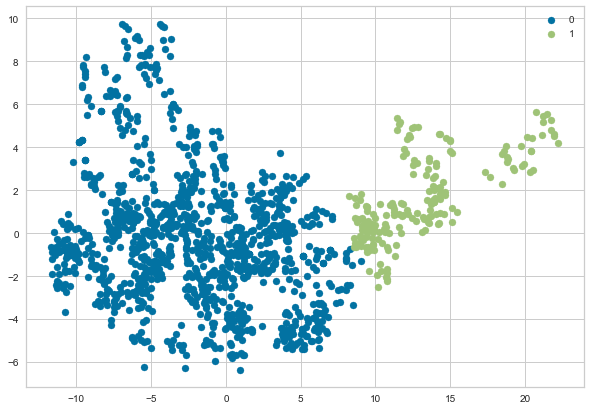

In [28]:
plt.figure(figsize=(10, 7))
plot_cluster(df_pca,labels)

In [207]:
pd.DataFrame(df_pca[labels==0]).describe()

,0,1
count,1176.000000,1176.000000
mean,-2.140191,-0.258263
std,4.896093,3.133093
min,-11.695889,-6.347220
25%,-5.928805,-2.343014
50%,-2.291677,-0.626498
75%,1.453790,1.204141
max,9.021863,9.750897


In [208]:
pd.DataFrame(df_pca[labels==1]).describe()

,0,1
count,196.000000,196.000000
mean,12.841145,1.549579
std,3.626954,1.916749
min,8.257116,-2.506183
25%,9.853303,0.173509
50%,11.985752,1.130049
75%,14.226114,3.120952
max,22.228621,5.642637


### Question6
This time, use the KElbowVisualizer algorithm (located in the yellowbrick.cluster library) and draw the elbow criterion graph in terms of k. Find the best k value. Show the result of clustering as a scatter plot

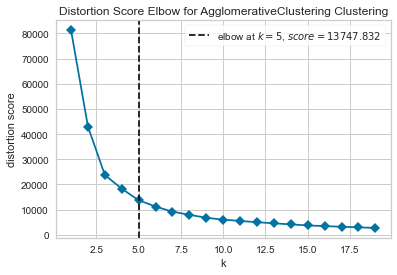

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
cluster = AgglomerativeClustering()
labels = cluster.fit_predict(df_pca)
visualizer = KElbowVisualizer(cluster, k=(1,20), timings=False)
visualizer.fit(df_pca)       
visualizer.show()  

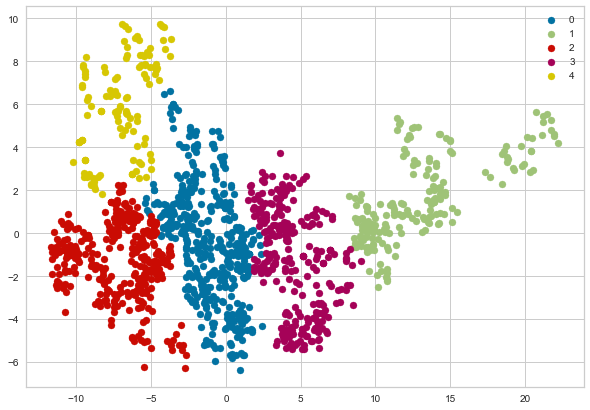

In [30]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
labels = cluster.fit_predict(df_pca)

plt.figure(figsize=(10, 7))
plot_cluster(df_pca,labels)

### Question7
One of the methods of evaluating the accuracy of clustering is evaluation using the _inertia method.

* For the number of clusters between 1 and 5, calculate this criterion using the K-means method 
* show it on a scatter diagram.

Inertia or Sum of Squares Errors (or SSE) measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

A good model is one with low inertia AND a low number of clusters (K). However, this is a tradeoff because as K increases, inertia decreases.

C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


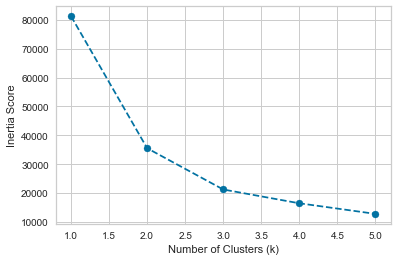

In [34]:
# Set range of k values to test
k_values = range(1, 6)

# Initialize empty list to store results
inertia_scores = []

# Loop over k values and perform clustering
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_pca)
    inertia_scores.append(kmeans.inertia_)

# Plot inertia scores vs. number of clusters
plt.scatter(k_values, inertia_scores)
plt.plot(k_values, inertia_scores, linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia Score')
plt.show()

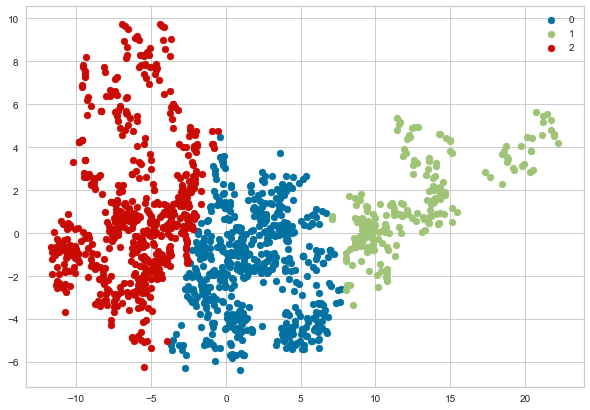

In [35]:
kmeans = KMeans(n_clusters =3).fit(df_pca)
labels = kmeans.fit_predict(df_pca)

plt.figure(figsize=(10, 7))
plot_cluster(df_pca,labels)

### Question8

This time, normalize the initial dataset based on tsne and show it in two dimensions.

t-SNE is an algorithm used to visualize high-dimensional data. Because we can’t visualize anything that has more than two — perhaps three — dimensions, t-SNE does this by reducing the number of dimensions in the data.
It does this while preserving the structure of the data as much as possible. If we compare t-SNE to PCA we see that PCA tries to preserve the information in the data, while t-SNE would try to preserve the relative distances and the clustering structure in the data, therefore with less regard to the total preserved information.

In [37]:
tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(df)

C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Win 10\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<ipython-input-38-f664b6089a75>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x=df_tsne[:,0], y=df_tsne[:,1], cmap='rainbow')


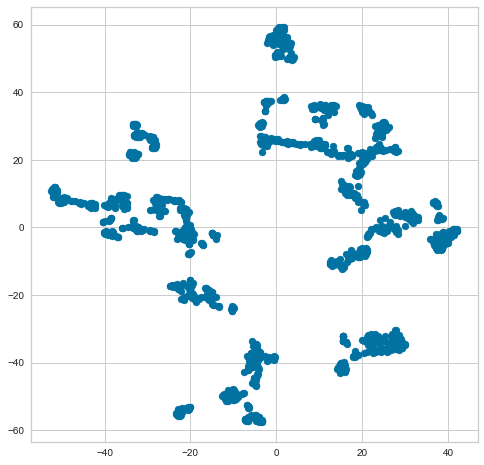

In [38]:
plt.figure(figsize=(8, 8))
plt.scatter(x=df_tsne[:,0], y=df_tsne[:,1], cmap='rainbow')

### Question9

Use the DBScan algorithm and show the clustering result. You can perform the algorithm with different parameters

In [51]:
# Perform clustering with DBSCAN
dbscan = DBSCAN(eps=10, min_samples=5)
cluster_labels = dbscan.fit_predict(df_tsne)

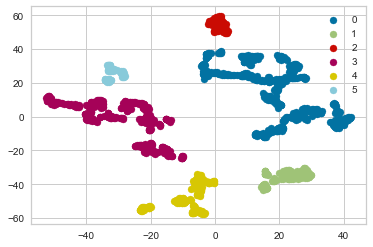

In [52]:
# Plot scatter plot of data with color-coded clusters
plot_cluster(df_tsne,cluster_labels)

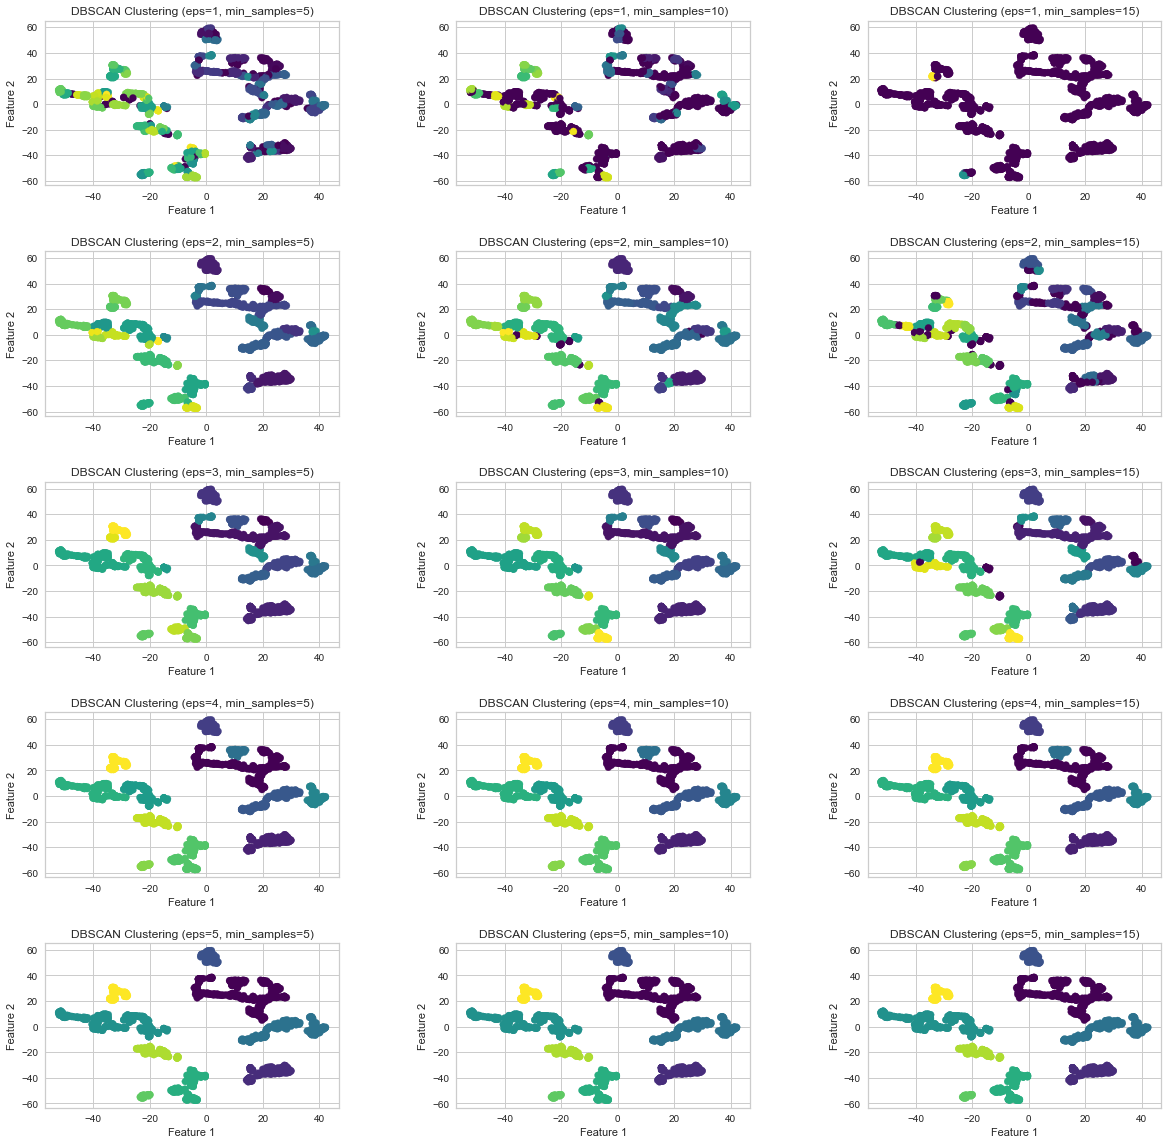

In [56]:
# Define a list of parameter values to test
eps_values = [1, 2, 3 , 4 , 5]
min_samples_values = [5, 10, 15]

# Create a figure with 3x3 subplots
fig, axs = plt.subplots(5, 3, figsize=(20, 20))

# Loop over parameter values and perform clustering
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(df_tsne)

        # Plot scatter plot of data with color-coded clusters
        axs[i, j].scatter(df_tsne[:,0], df_tsne[:,1], c=cluster_labels, cmap='viridis')
        axs[i, j].set_xlabel('Feature 1')
        axs[i, j].set_ylabel('Feature 2')
        axs[i, j].set_title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Display the figure
plt.show()

### Question10

By the NearestNeighbors algorithm from the sklearn.neighbors library, you can improve your estimation in the previous step. Use this library and estimate dbscan parameters with it.


DBSCAN requires ε and minPts parameters for clustering. The minPts parameter is easy to set. The minPts
should be 4 for two-dimensional dataset. For multidimensional dataset, minPts should be 2 * number of
dimensions.

To determine the optimal ε parameter, I will compute the k-nearest neighbor (kNN) distances (average distance of every data point to its k-nearest neighbors) of an input dataset using the k-nearest neighbor method (unsupervised nearest neighbors learning).

Text(0.5, 0, 'Sorted observations (4th NN)')

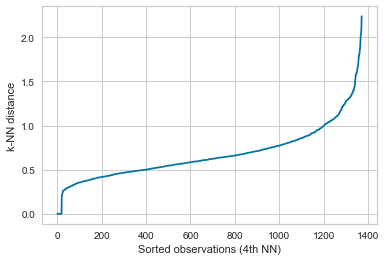

In [60]:
# Create an instance of the NearestNeighbors class
k = 4 # expected number of points in each neighborhood
nn_model = NearestNeighbors(n_neighbors=k)
nn_model.fit(df_tsne)

# Plot the distances between each point and its kth nearest neighbor
distances, indices = nn_model.kneighbors(df_tsne)
distances = np.sort(distances[:,k-1], axis=0)
plt.plot(distances)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")

In [61]:
from kneed import KneeLocator
kneedle = KneeLocator(
    x = range(1, len(distances)+1),
    y = k_dist,
    S = 1.0,
    curve = "concave",
    direction = "increasing",
    online=True)
# get the estimate of knee point
print(kneedle.knee_y)

1.8438665121426354


Counter({7: 156, 20: 101, 2: 92, 24: 80, 21: 78, 3: 77, 10: 60, 27: 60, 11: 55, 28: 50, 8: 44, 14: 40, 5: 37, 19: 37, 9: 36, 25: 35, 1: 30, 22: 30, 33: 30, 32: 29, 6: 24, 0: 22, 26: 20, 30: 20, 13: 16, 4: 14, 15: 12, 16: 12, 12: 11, 17: 11, 18: 11, 29: 10, 34: 10, 23: 7, 31: 7, 35: 6, -1: 2})


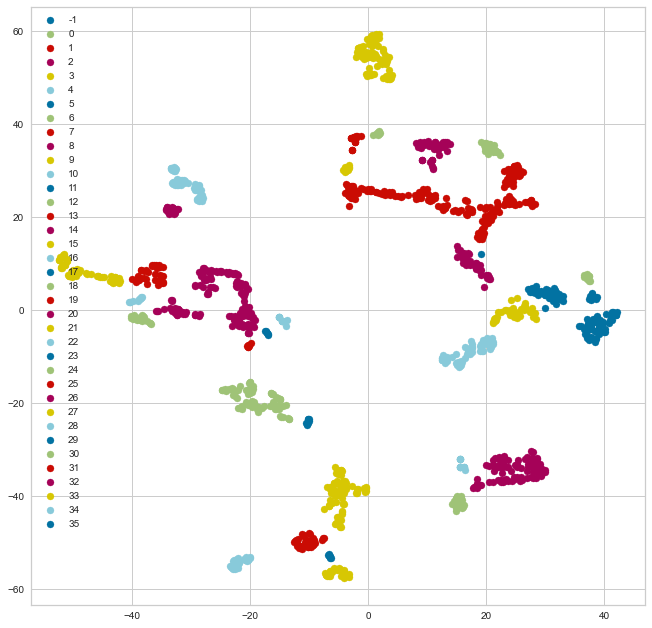

In [62]:
dbscan = DBSCAN(eps = 1.8, min_samples=4).fit(df_tsne)
labels = dbscan.labels_

print(Counter(labels))
plt.figure(figsize=(11, 11))
plot_cluster(df_tsne,labels)

Counter({1: 198, 12: 156, 2: 130, 13: 114, 17: 90, 14: 78, 3: 77, 4: 74, 6: 60, 7: 55, 20: 50, 5: 44, 10: 41, 16: 37, 18: 35, 15: 30, 9: 27, 0: 22, 8: 22, 19: 20, 11: 12})


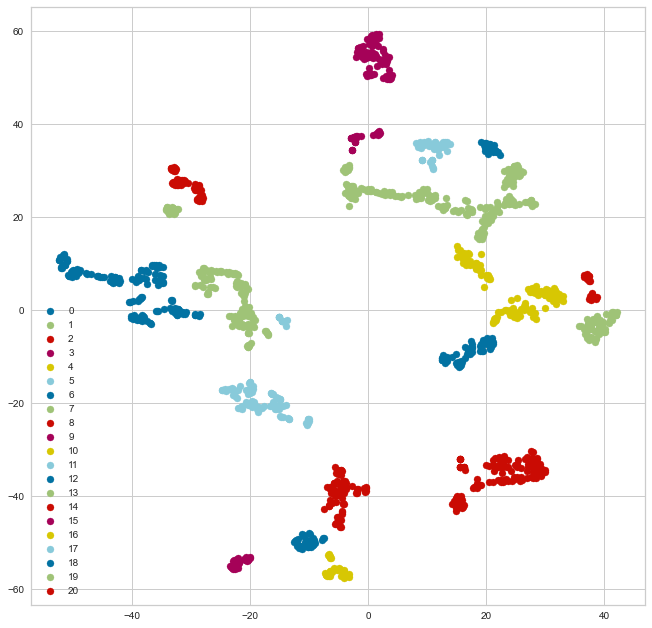

In [63]:
dbscan = DBSCAN(eps = 3, min_samples=4).fit(df_tsne)
labels = dbscan.labels_

print(Counter(labels))
plt.figure(figsize=(11, 11))
plot_cluster(df_tsne,labels)

Counter({0: 288, 7: 156, 8: 150, 3: 134, 1: 130, 6: 126, 10: 90, 2: 77, 5: 77, 11: 70, 4: 44, 9: 30})


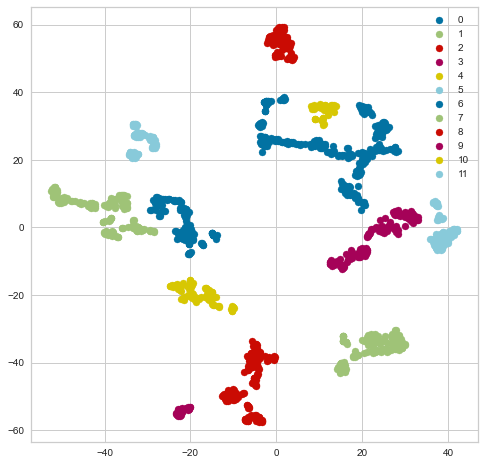

In [64]:
dbscan = DBSCAN(eps = 4, min_samples=4).fit(df_tsne)
labels = dbscan.labels_

print(Counter(labels))
plt.figure(figsize=(8, 8))
plot_cluster(df_tsne,labels)

Counter({0: 332, 4: 282, 3: 211, 5: 150, 1: 130, 7: 90, 2: 77, 8: 70, 6: 30})


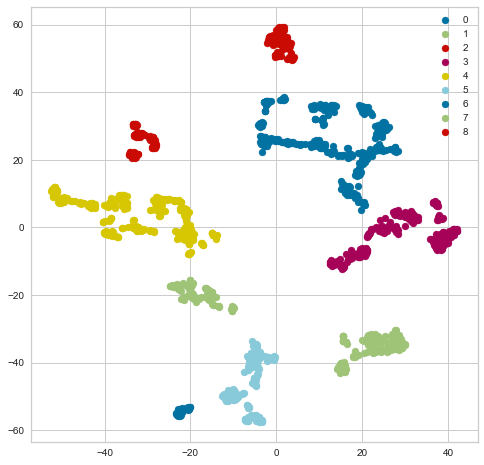

In [65]:
dbscan = DBSCAN(eps = 5, min_samples=4).fit(df_tsne)
labels = dbscan.labels_

print(Counter(labels))
plt.figure(figsize=(8, 8))
plot_cluster(df_tsne,labels)

Counter({0: 543, 3: 282, 4: 150, 1: 130, 6: 90, 2: 77, 7: 70, 5: 30})


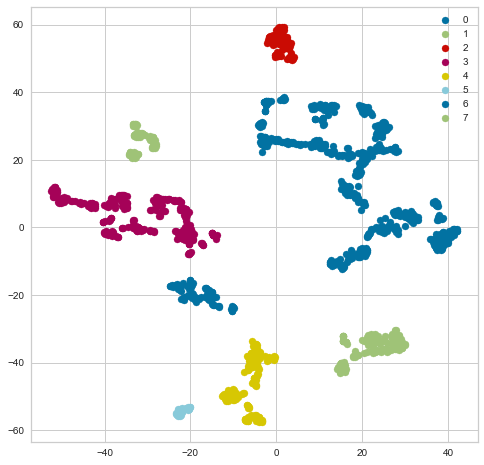

In [66]:
dbscan = DBSCAN(eps = 6, min_samples=4).fit(df_tsne)
labels = dbscan.labels_

print(Counter(labels))
plt.figure(figsize=(8, 8))
plot_cluster(df_tsne,labels)

Counter({0: 543, 3: 282, 4: 150, 1: 130, 6: 90, 2: 77, 7: 70, 5: 30})


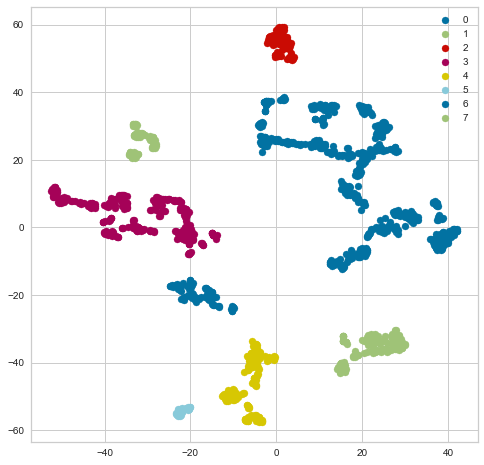

In [67]:
dbscan = DBSCAN(eps = 7, min_samples=4).fit(df_tsne)
labels = dbscan.labels_

print(Counter(labels))
plt.figure(figsize=(8, 8))
plot_cluster(df_tsne,labels)

Counter({0: 543, 3: 372, 4: 150, 1: 130, 2: 77, 6: 70, 5: 30})


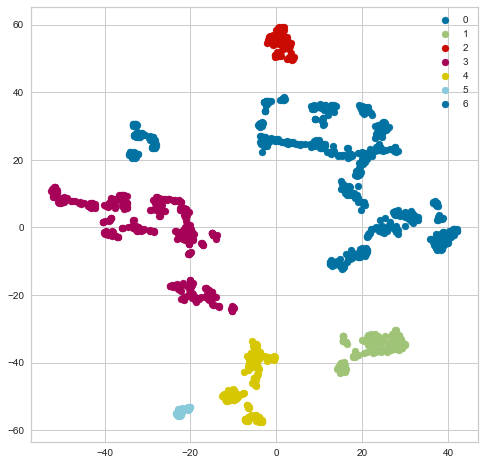

In [68]:
dbscan = DBSCAN(eps = 8, min_samples=4).fit(df_tsne)
labels = dbscan.labels_

print(Counter(labels))
plt.figure(figsize=(8, 8))
plot_cluster(df_tsne,labels)